[https://github.com/Samurarahman/CSE475/blob/main/MangoLeaf.ipynb](https://github.com/Samurarahman/CSE475/blob/main/MangoLeaf.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = '/content/drive/MyDrive/Untitled folder2/475/lab1/MangoLeafBD Dataset/MangoLeafBD Dataset'

In df we have stored the path of our MangoLeafBD dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.tree import plot_tree
from sklearn import tree
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Here imported necessary libraries

In [ ]:
mangotypes = ['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back',
               'Gall Midge', 'Powdery Mildew', 'Sooty Mould', 'Healthy']

This code defines a list called mangotypes that categorizes different mango conditions

In [ ]:
def load_images(df, mangotypes, image_size=(64, 64)):
    data = []
    labels = []
    for class_idx, class_name in enumerate(mangotypes):
        image_dir = Path(df) / class_name
        for img_path in image_dir.glob("*.jpg"):
            image = Image.open(img_path).resize(image_size)
            data.append(np.array(image).flatten())
            labels.append(class_idx)
    return np.array(data), np.array(labels)

This function load_images loads images from subdirectories for each class in mangotypes, resizes them to image_size (default 64x64), flattens them, and appends them to data. It returns data as a 2D array of flattened images and labels as the corresponding class indices.

In [ ]:
data, labels = load_images(df, mangotypes)
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (4000, 12288)
Labels shape: (4000,)


 loads the images and labels using load_images, then prints the shapes of data and labels

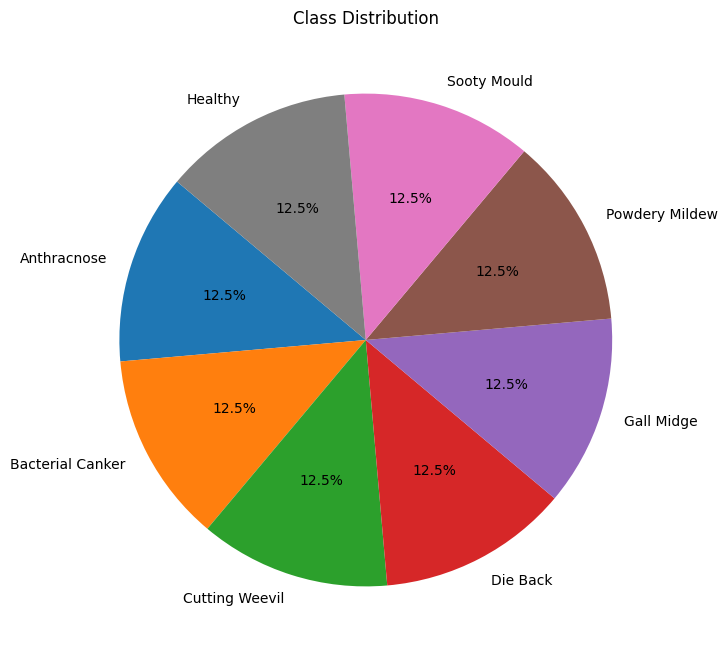

In [ ]:
class_counts = np.bincount(labels)
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=mangotypes, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()


This pie chart shows the distribution of different classes in the dataset, with each slice representing one mango type. Each class has an equal proportion of 12.5%, indicating a balanced dataset across the eight classes.

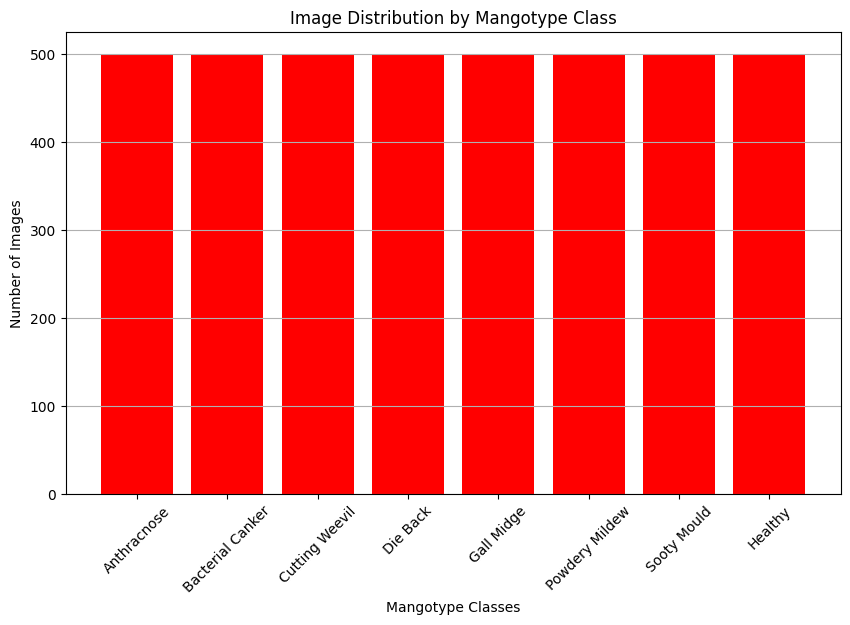

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mangotypes, class_counts, color='red')
plt.title('Image Distribution by Mangotype Class')
plt.xlabel('Mangotype Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y')

This bar chart displays the image distribution of different mango diseases, with an equal number of 500 images for each disease category including healthy mango images. This suggests a balanced dataset for disease classification.

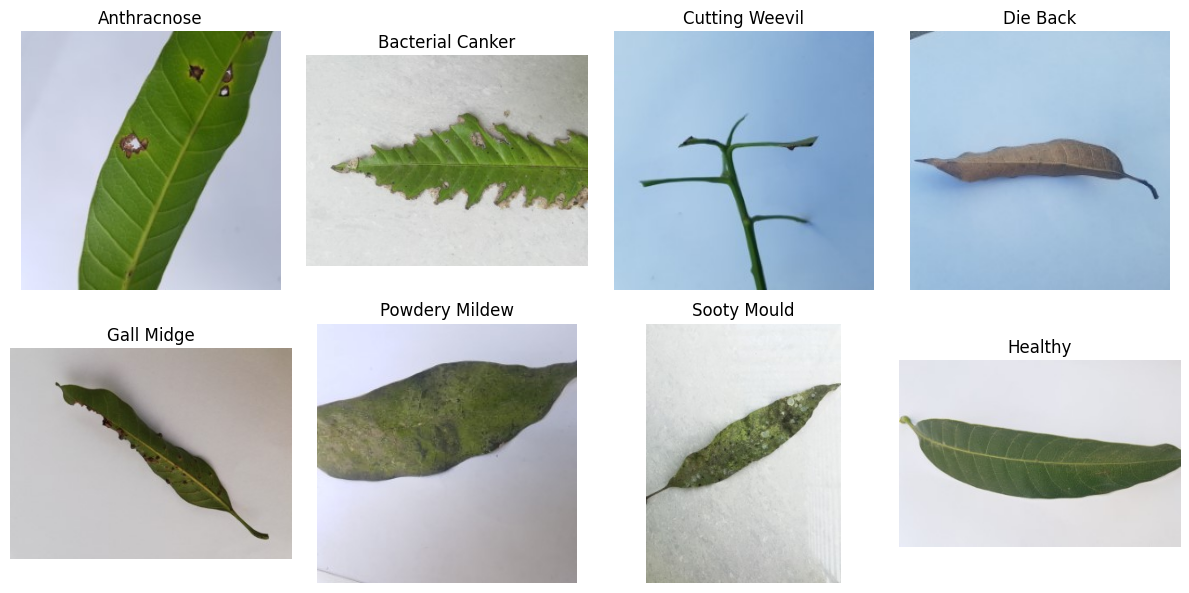

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i, class_name in enumerate(mangotypes):
    img_path = next(Path(df, class_name).glob("*.jpg"))
    img = Image.open(img_path)
    ax = axs[i // 4, i % 4]
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')

plt.tight_layout()
plt.show()


This code creates a grid of subplots to display the first .jpg image from each mangotype class specified in the mangotypes list, setting the corresponding class name as the title for each subplot. It uses matplotlib for visualization, ensuring a clean layout by turning off the axes and adjusting spacing .

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (3200, 12288), Test set size: (800, 12288)


Splits the dataset data and its corresponding labels labels into training and testing subsets, with 80% of the data allocated for training and 20% for testing, and prints the sizes of both subsets.

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

 Trained our decision tree model

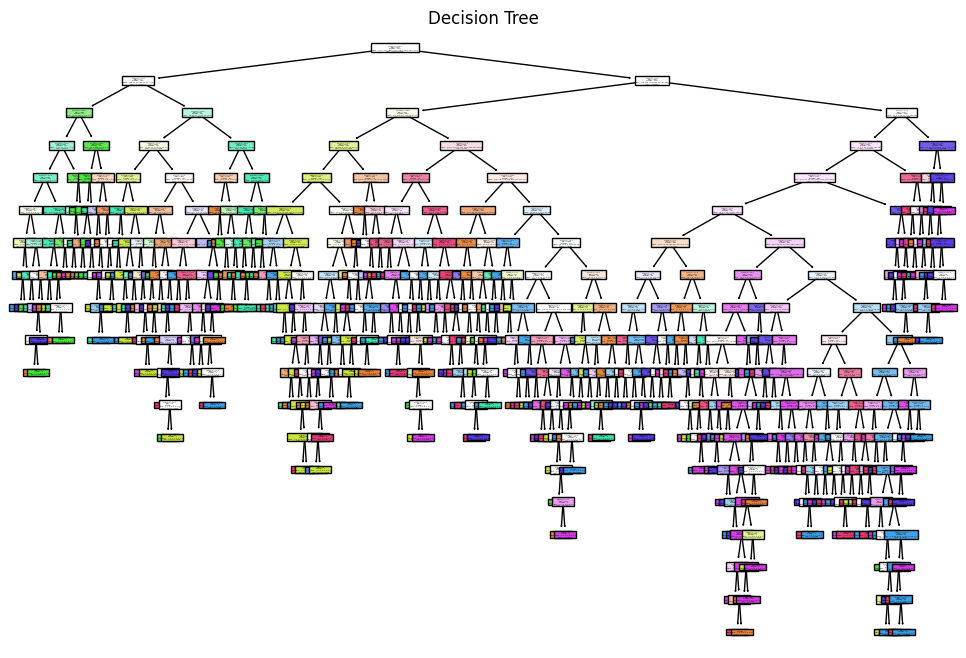

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt, class_names=mangotypes, filled=True)
plt.title('Decision Tree')
plt.show()

The structure of a trained decision tree classifier is shown in this diagram. The data is divided into branches by each node, which indicates a choice based on a feature. The final claasification results were shown by the leaves at the bottom. The different classifications in the dataset are represented by the different colors. The classification of mango leaf conditions is demonstrated by this tree.

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

trained our random forest classifier model

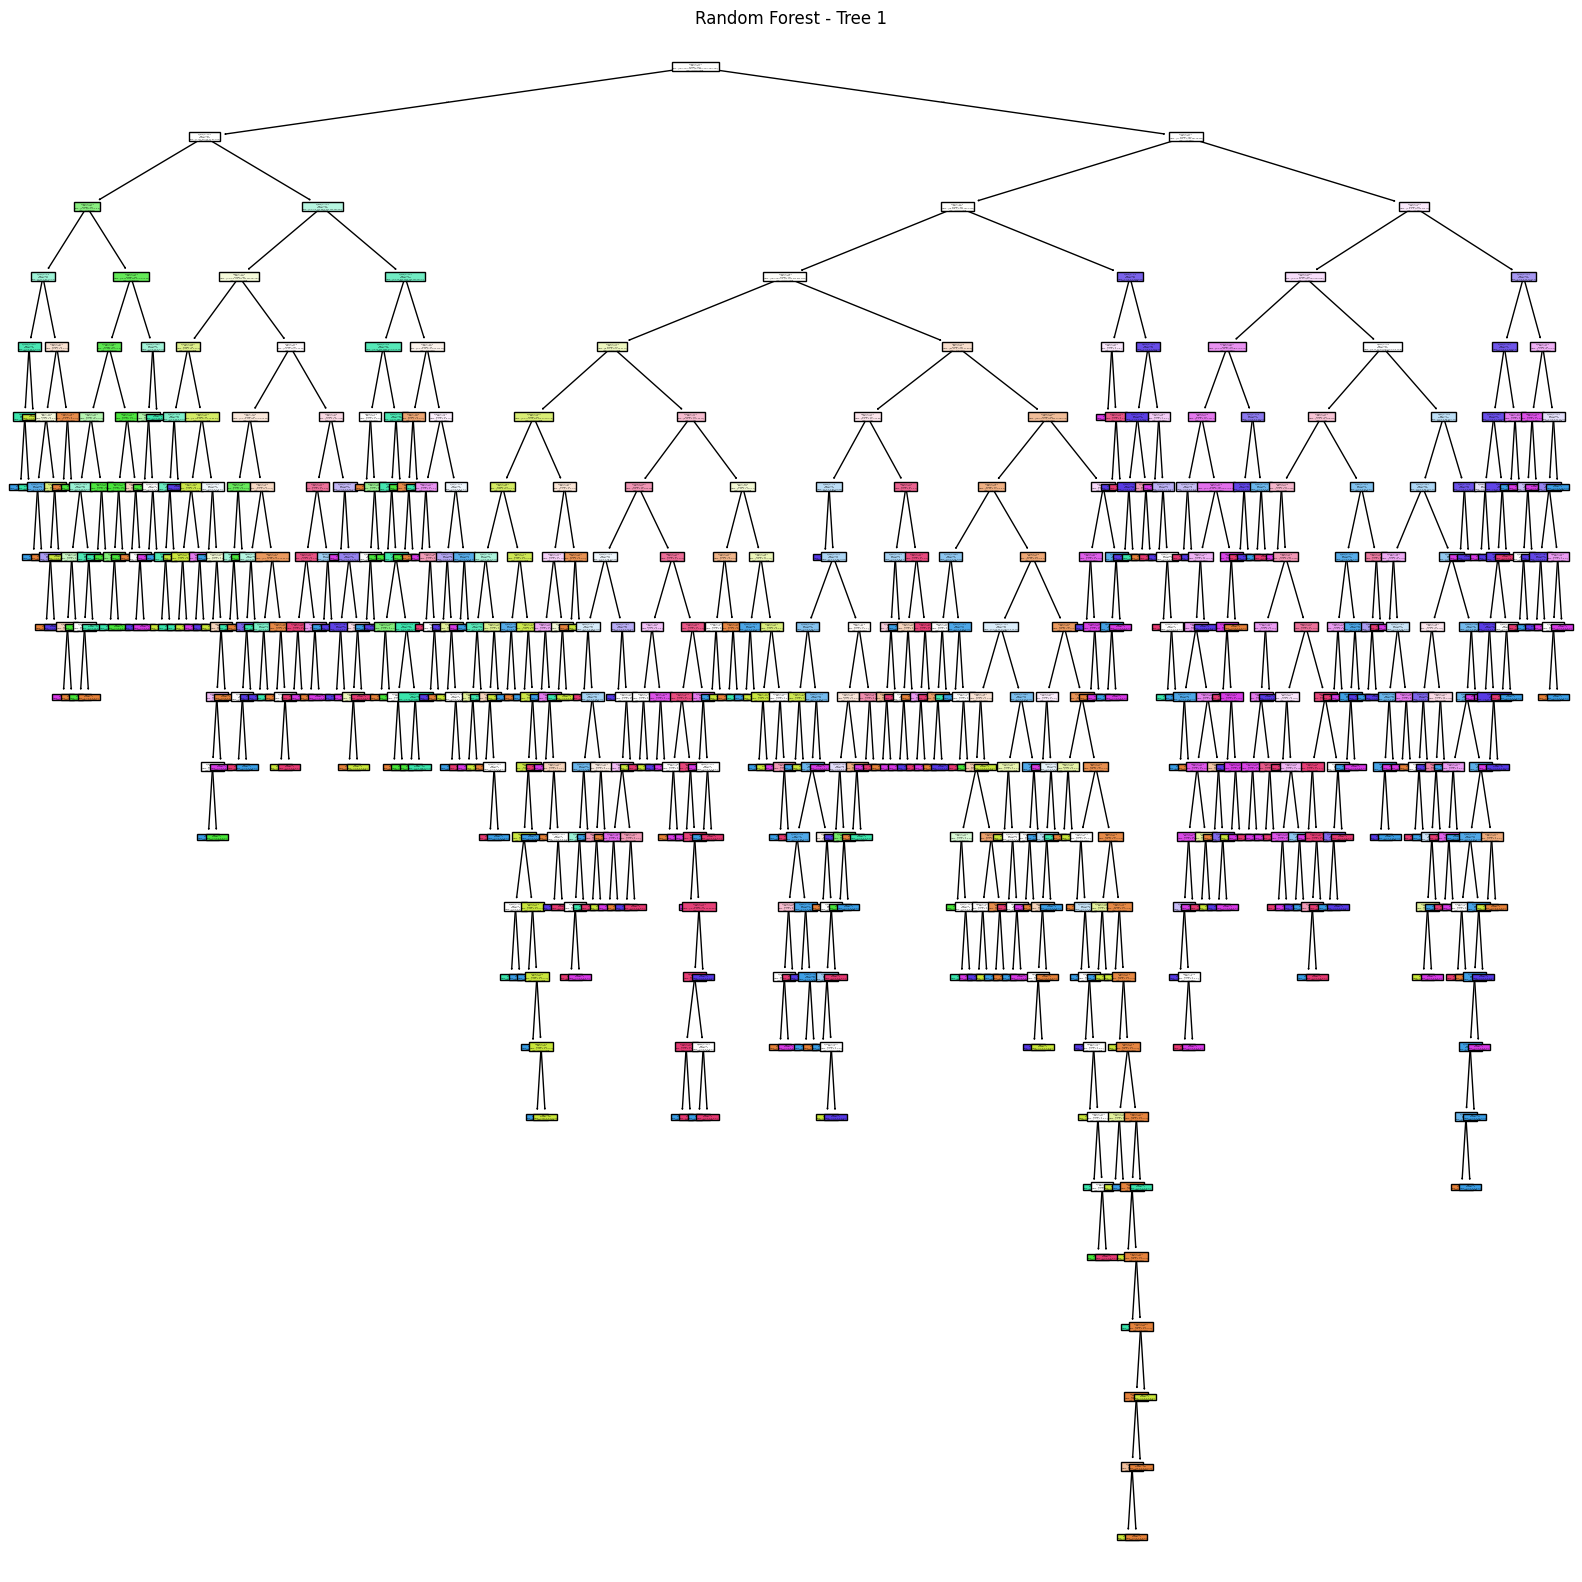

In [ ]:
plt.figure(figsize=(20, 20))
_ = plot_tree(rf.estimators_[0], filled=True, class_names=mangotypes)
plt.title('Random Forest - Tree 1')
plt.show()

The random forest tree shown in this diagram is a group of decision trees that cooperate to increase prediction accuracy. Every note indicates a choice based on a feature, and the branches show possible results that could result in additional splits or leaf nodes, which stand for final classifications. The colors show how the model searches through the features to predict outcomes. Through a majority vote among all the trees in the forest, this tree is only one member of the group that contributes to the final decision.

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nDecision Tree Classification Report")
print(classification_report(y_test, dt_pred, target_names=mangotypes))
print("\nRandom Forest Classification Report")
print(classification_report(y_test, rf_pred, target_names=mangotypes))

Decision Tree Accuracy: 0.6875
Random Forest Accuracy: 0.89

Decision Tree Classification Report
                  precision    recall  f1-score   support

     Anthracnose       0.70      0.63      0.67       123
Bacterial Canker       0.74      0.80      0.77        86
  Cutting Weevil       0.94      0.94      0.94       112
        Die Back       0.83      0.85      0.84       101
      Gall Midge       0.52      0.54      0.53       104
  Powdery Mildew       0.61      0.62      0.62        90
     Sooty Mould       0.49      0.53      0.51        91
         Healthy       0.63      0.56      0.59        93

        accuracy                           0.69       800
       macro avg       0.68      0.68      0.68       800
    weighted avg       0.69      0.69      0.69       800


Random Forest Classification Report
                  precision    recall  f1-score   support

     Anthracnose       0.90      0.87      0.88       123
Bacterial Canker       0.86      0.94      0.90   

The Random Forest model has a higher accuracy score of 0.89 compared to the Decision Tree model's accuracy score of 0.69. This means the Random Forest model is more successful at predicting the correct disease type for mango trees. Both models performed well in classifying some diseases like Cutting Weevil, while they struggled with diseases like Powdery Mildew. The overall performance of the Random Forest model is better than the Decision Tree model based on these classification results.

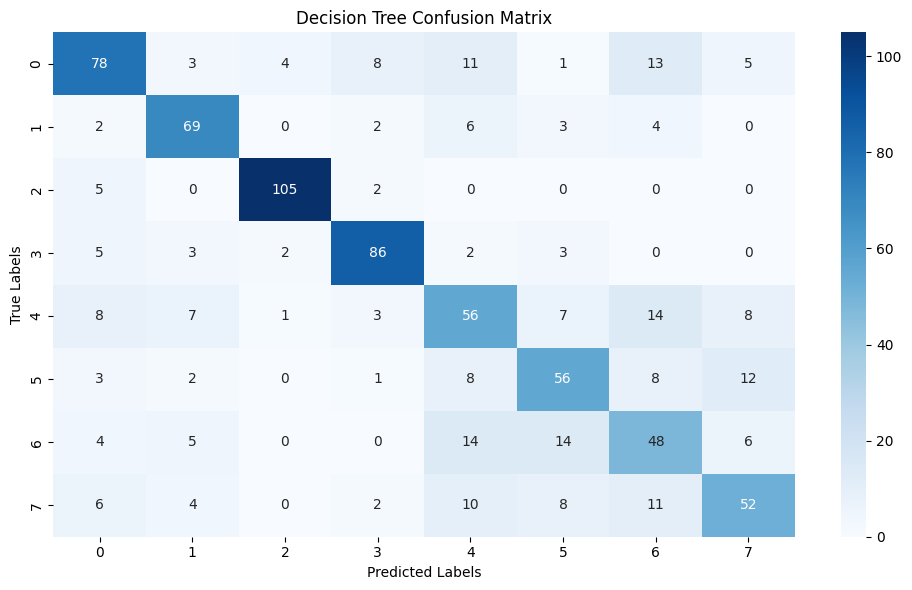

In [ ]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

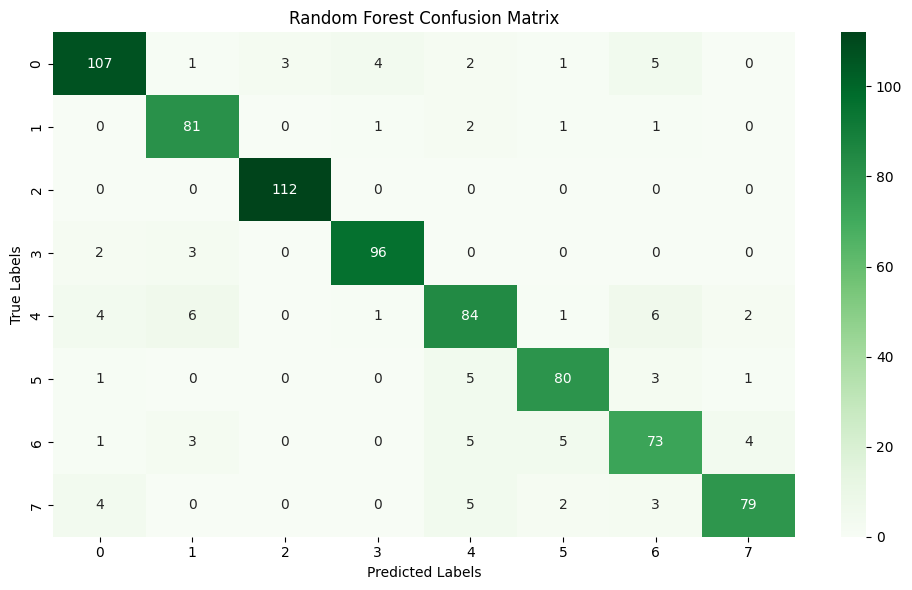

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Compared to the Decision Tree model, the Random Forest model has a higher diagonal value. This suggests that the Random Forest model predicts the class labels with greater accuracy. Compared to the Decision Tree model, the Random Forest model has less off-diagonal values. This indicates the Random Forest model has a lower probability of incorrectly identifying data points. These findings show that the Random Forest model performs better on this dataset than the Decision Tree model.
